In [2]:
import random

def calc_bmi(h,w): # BMI를 계산해서 레이블을 리턴하는 함수, (1: thin, 2: normal, 3: fat)
    bmi=w/(h/100)**2
    if bmi<18.5:
        return "1"
    if bmi<25:
        return "2"
    return "3"

fp=open("d:/data/bmi/bmi.csv","w",encoding="utf-8") # 출력 파일 준비
fp.write("height,weight,label\r\n")
cnt={"1":0, "2":0, "3":0}
for i in range(20000): # 무작위 키/몸무게 데이터 생성
    h=random.randint(120,200)
    w=random.randint(35,80)
    label=calc_bmi(h,w)
    cnt[label]+=1
    fp.write(f'{h},{w},{label}\r\n')

fp.close()
print('데이터가 생성되었습니다,',cnt)

데이터가 생성되었습니다, {'1': 6515, '2': 5931, '3': 7554}


In [3]:
import pandas as pd

df=pd.read_csv("d:/data/bmi/bmi.csv") # 데이터 로딩
df.head()

,height,weight,label
0,198,73,2
1,195,67,1
2,141,77,3
3,186,38,1
4,182,64,2


In [4]:
train_cols=df.columns[0:2]
print(train_cols)
X=df[train_cols]
y=df["label"]
print(df[train_cols].head())
print(y.head())

Index(['height', 'weight'], dtype='object')
   height  weight
0     198      73
1     195      67
2     141      77
3     186      38
4     182      64
0    2
1    1
2    3
3    1
4    2
Name: label, dtype: int64


In [5]:
print(df.columns)
print()
print(df.shape)
print()
print(df.describe())
print()
print(df.groupby("label").mean()) # 분류를 기준으로 한 평균값들


Index(['height', 'weight', 'label'], dtype='object')

(20000, 3)

             height        weight        label
count  20000.000000  20000.000000  20000.00000
mean     160.164350     57.330450      2.05195
std       23.352475     13.270383      0.83713
min      120.000000     35.000000      1.00000
25%      140.000000     46.000000      1.00000
50%      160.000000     57.000000      2.00000
75%      180.000000     69.000000      3.00000
max      200.000000     80.000000      3.00000

           height     weight
label                       
1      179.987567  47.433768
2      163.973360  58.468555
3      140.077045  64.972333


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

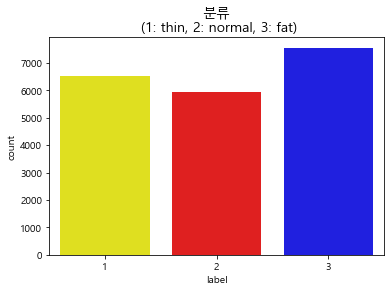

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager,rc
import seaborn as sns

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name() # 한글 처리
rc('font', family=font_name)

colors=["yellow", "red", "blue"]
sns.countplot('label', data=df, palette=colors)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [7]:
print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   height  weight
0     198      73
1     195      67
2     141      77
3     186      38
4     182      64
0    2
1    1
2    3
3    1
4    2
Name: label, dtype: int64


In [8]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['label'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [9]:
df2['label'].value_counts()

1    5931
2    5931
3    5931
Name: label, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (1: thin, 2: normal, 3: fat)')

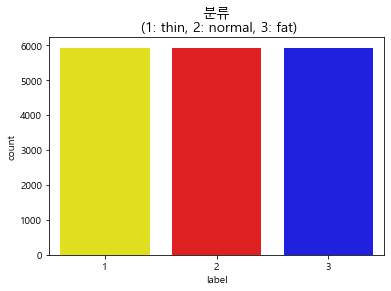

In [10]:
sns.countplot('label', data=df2, palette=colors)
plt.title('분류\n (1: thin, 2: normal, 3: fat)', fontsize=14)

In [11]:
train_cols=['height', 'weight']

X=X_samp[train_cols]
y=y_samp['label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
print("학습용 :",model.score(X_train, y_train))
print("검증용 :",model.score(X_test, y_test))

학습용 : 0.9820148939159759
검증용 : 0.9822983984265243


In [14]:
# confusion matrix(혼동행렬) 출력
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
cm

array([[1138,   17,    0],
       [  17, 1180,   10],
       [   0,   19, 1178]], dtype=int64)

In [15]:
df_cm=pd.DataFrame(cm, index=[1,2,3], columns=[1,2,3])
df_cm

,1,2,3
1,1138,17,0
2,17,1180,10
3,0,19,1178


<AxesSubplot:title={'center':'Confusion Matrix'}>

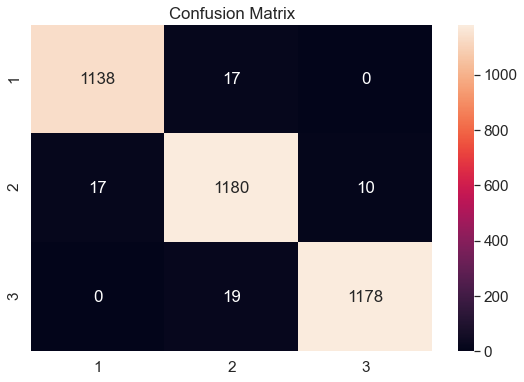

In [16]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt='d')